In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm
import ipywidgets
import ipdb
from plot_utils import get_model_names_for_degree

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

['chebyshev_linear_regression_big_2x'
 'chebyshev_linear_regression_toy_0.2_noise'
 'chebyshev_linear_regression_toy_0.5_noise_0.00005_lr'
 'chebyshev_linear_regression_toy_11_take_1'
 'chebyshev_linear_regression_toy_16_layers'
 'chebyshev_linear_regression_toy_chebyshev_as_baseline_for_loss'
 'chebyshev_linear_regression_toy_just_base_8'
 'chebyshev_linear_regression_toy_noise'
 'chebyshev_linear_regression_toy_standard_0.00005_lr_no_noise_no_curriculum'
 'chebyshev_linear_regression_toy_uniform_sampling'
 'chebyshev_linear_regression_toy_weighted_mse' 'curriculum'
 'kernel_linear_regression_toy_basis_4'
 'kernel_linear_regression_toy_basis_4_dim_1'
 'kernel_linear_regression_toy_basis_4_normalized'
 'kernel_linear_regression_toy_basis_4_normalized_x_scale_2'
 'kernel_linear_regression_toy_dim_20_basis_2'
 'kernel_linear_regression_toy_just_basis_4_log' 'lr00005']
                                          run_id                      task  \
7                            chebyshev-2x-0

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
7,chebyshev-2x-0.0001,kernel_linear_regression,Transformer-plus,basis_dim=11_different_degrees=True_highest_de...,-1,-1,1,24,16,chebyshev_linear_regression_big_2x
12,chebyshev-noise-0.2,kernel_linear_regression,Transformer,basis_dim=11_different_degrees=True_highest_de...,-1,-1,1,12,8,chebyshev_linear_regression_toy_0.2_noise
10,chebyshev-noise-0.5,kernel_linear_regression,Transformer,basis_dim=11_different_degrees=True_lowest_deg...,-1,-1,1,12,8,chebyshev_linear_regression_toy_0.5_noise_0.00...
11,0bec2885-e67b-4bf1-8f3b-395b30d31c77,kernel_linear_regression,Transformer,basis_dim=11_different_degrees=True_highest_de...,-1,-1,1,12,8,chebyshev_linear_regression_toy_11_take_1
3,transformer-16-layer-standard,kernel_linear_regression,Transformer-16,basis_dim=11_different_degrees=True_highest_de...,-1,-1,1,16,8,chebyshev_linear_regression_toy_16_layers
4,standard_chebyshev_baseline,kernel_linear_regression,Transformer,basis_dim=11_different_degrees=True_highest_de...,-1,-1,1,12,8,chebyshev_linear_regression_toy_chebyshev_as_b...
9,just-base-8-standard,kernel_linear_regression,Transformer,basis_dim=8_different_degrees=False_highest_de...,-1,-1,1,12,8,chebyshev_linear_regression_toy_just_base_8
1,68e58ac0-5791-4317-b3f6-a325b487c0df,kernel_linear_regression,Transformer,basis_dim=4,-1,-1,1,12,8,chebyshev_linear_regression_toy_noise
8,standard-0.00005-lr-no-noise,kernel_linear_regression,Transformer,basis_dim=11_different_degrees=True_highest_de...,-1,-1,1,12,8,chebyshev_linear_regression_toy_standard_0.000...
17,chebyshev-take1-bad-combination-distribution,kernel_linear_regression,Transformer,basis_dim=4,-1,-1,1,12,8,chebyshev_linear_regression_toy_uniform_sampling


In [6]:
task = "kernel_linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "standard-0.00005-lr-no-noise"  # if you train more models, replace with the run_id from the table above
#run_id = "lr_00005"
run_path = os.path.join(run_dir, task, run_id)


run_id_big = "chebyshev-noise-0.2"
run_path_big = os.path.join(run_dir, task, run_id_big)

run_id_noise_2 = "chebyshev-noise-0.5"
run_path_noise_2 = os.path.join(run_dir, task, run_id_noise_2) 


run_path = '' # enter the path to the downloaded checkpoint here
metrics = get_run_metrics(run_path, run_path_big, run_path_noise_2, include_noise=True, ground_truth_loss=True, smoothing=0.00)  # these are normally precomputed at the end of training


../models/kernel_linear_regression/standard-0.00005-lr-no-noise/metrics.json
no metrics found
chebyshev_1_driver=None
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
torch.Size([64, 41, 2])
ridge_chebyshev_1_driver=None
gpt2_embd=256_layer=12_head=8
gpt2_embd=256_layer=12_head=8_0.2_noise
gpt2_embd=256_layer=12_head=8_0.5_noise
chebyshev_2_driver=None
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3])
torch.Size([64, 41, 3]

# Plot pre-computed metrics

chebyshev_linear_regression_toy_standard_0.00005_lr_no_noise_no_curriculum standard-0.00005-lr-no-noise


../models/kernel_linear_regression/standard-0.00005-lr-no-noise/metrics.json
chebyshev_1_driver=None
ridge_chebyshev_1_driver=None
gpt2_embd=256_layer=12_head=8
chebyshev_2_driver=None
ridge_chebyshev_2_driver=None
gpt2_embd=256_layer=12_head=8
chebyshev_3_driver=None
ridge_chebyshev_3_driver=None
gpt2_embd=256_layer=12_head=8
chebyshev_4_driver=None
ridge_chebyshev_4_driver=None
gpt2_embd=256_layer=12_head=8
chebyshev_5_driver=None
ridge_chebyshev_5_driver=None
gpt2_embd=256_layer=12_head=8
chebyshev_6_driver=None
ridge_chebyshev_6_driver=None
gpt2_embd=256_layer=12_head=8
chebyshev_7_driver=None
ridge_chebyshev_7_driver=None
gpt2_embd=256_layer=12_head=8
chebyshev_8_driver=None
ridge_chebyshev_8_driver=None
gpt2_embd=256_layer=12_head=8
chebyshev_9_driver=None
ridge_chebyshev_9_driver=None
gpt2_embd=256_layer=12_head=8
chebyshev_10_driver=None
ridge_chebyshev_10_driver=None
gpt2_embd=256_layer=12_head=8
chebyshev_11_driver=None
ridge_chebyshev_11_driver=None
gpt2_embd=256_layer=12_he

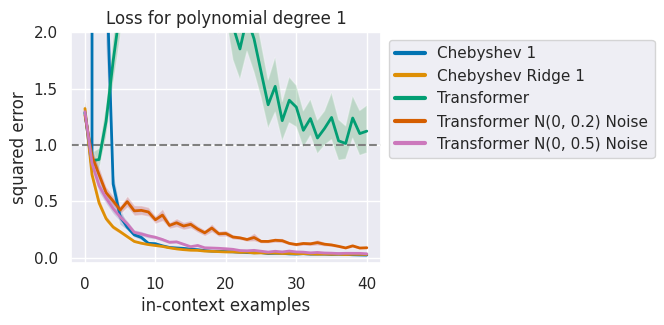

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 2', 'Chebyshev Ridge 2', 'Transformer', 'Transformer N(0, 0.2) Noise', 'Transformer N(0, 0.5) Noise'])


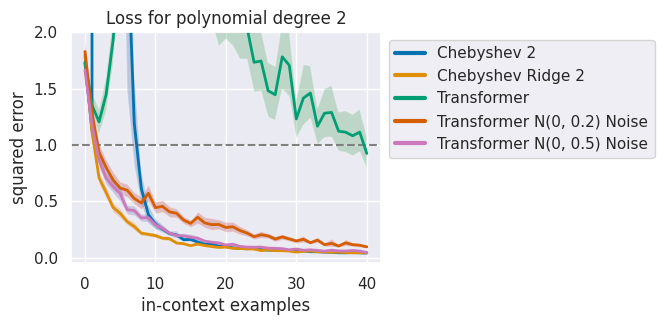

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 3', 'Chebyshev Ridge 3', 'Transformer', 'Transformer N(0, 0.2) Noise', 'Transformer N(0, 0.5) Noise'])


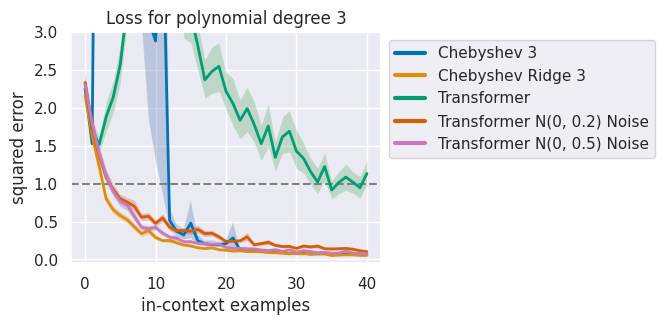

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 4', 'Chebyshev Ridge 4', 'Transformer', 'Transformer N(0, 0.2) Noise', 'Transformer N(0, 0.5) Noise'])


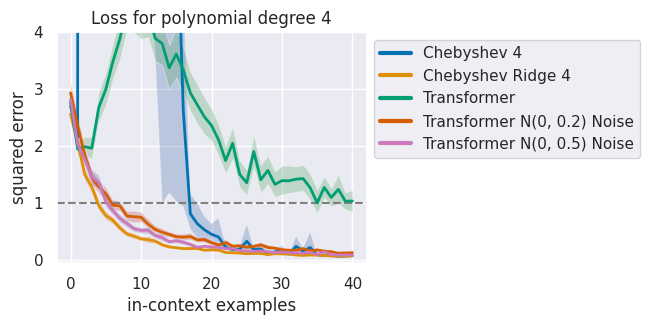

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 5', 'Chebyshev Ridge 5', 'Transformer', 'Transformer N(0, 0.2) Noise', 'Transformer N(0, 0.5) Noise'])


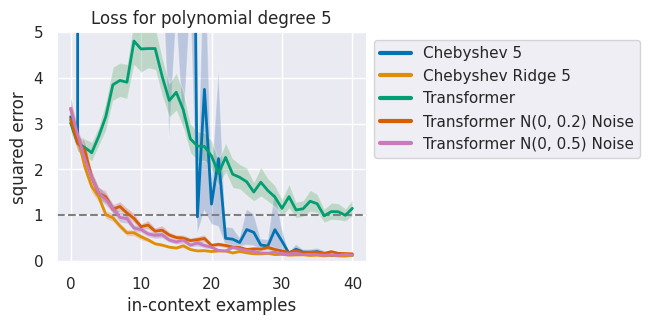

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 6', 'Chebyshev Ridge 6', 'Transformer', 'Transformer N(0, 0.2) Noise', 'Transformer N(0, 0.5) Noise'])


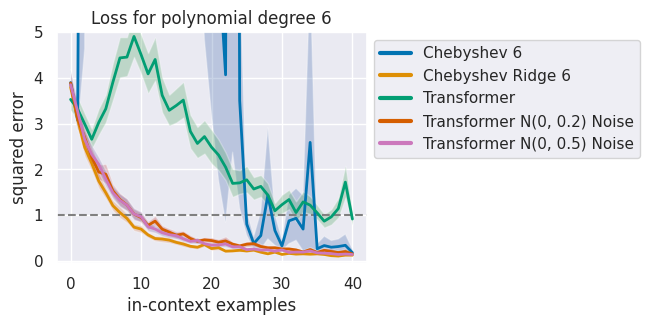

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 7', 'Chebyshev Ridge 7', 'Transformer', 'Transformer N(0, 0.2) Noise', 'Transformer N(0, 0.5) Noise'])


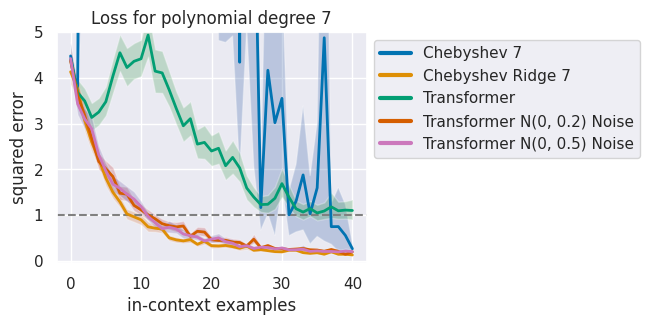

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 8', 'Chebyshev Ridge 8', 'Transformer', 'Transformer N(0, 0.2) Noise', 'Transformer N(0, 0.5) Noise'])


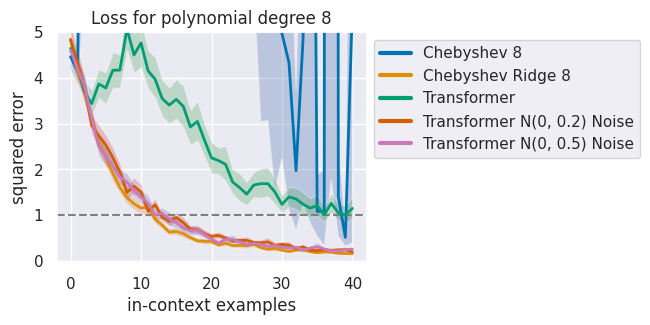

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 9', 'Chebyshev Ridge 9', 'Transformer', 'Transformer N(0, 0.2) Noise', 'Transformer N(0, 0.5) Noise'])


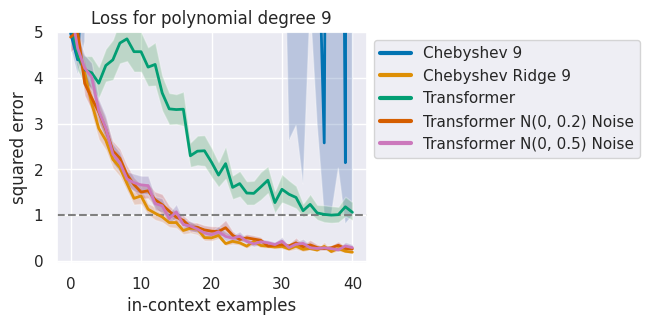

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 10', 'Chebyshev Ridge 10', 'Transformer', 'Transformer N(0, 0.2) Noise', 'Transformer N(0, 0.5) Noise'])


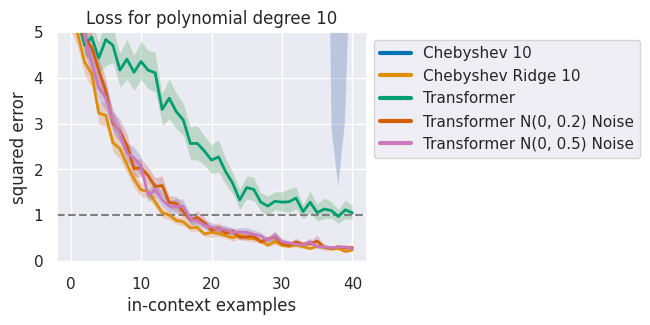

None
dict_keys(['degree-1', 'degree-10', 'degree-11', 'degree-2', 'degree-3', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 11', 'Chebyshev Ridge 11', 'Transformer', 'Transformer N(0, 0.2) Noise', 'Transformer N(0, 0.5) Noise'])


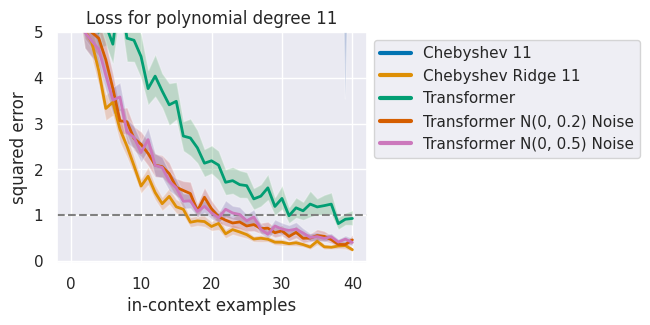

In [7]:
def valid_row(r, run_id):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=lambda x: valid_row(x, run_id), smoothing=0.00)
print(metrics["degree-" + str(1)])
#metrics_smooth = collect_results(run_dir, df, valid_row=lambda x: valid_row(x, run_id), smoothing=0.01)
#metrics_big = collect_results(run_dir, df, valid_row= lambda x: valid_row(x, run_id_big), smoothing=0.00)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

#for k, v in metrics_big.items():
#    for k2, v2 in v.items():
#        if "Transformer" in k2:
#            metrics[k][k2] = v2
#for k, v in metrics_smooth.items():
#    for k2, v2 in v.items():
#        if "Transformer" in k2:
#            metrics[k][k2+ " Smoothed"] = v2

ylims = [2, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5]
for degree in range(1, 12):
    models = get_model_names_for_degree(degree)
    print(models)
    print(metrics.keys())
    print(metrics["degree-" + str(degree)].keys())
    basic_plot(metrics["degree-" + str(degree)], models=models, ylim=ylims[degree-1])
    plt.title("Loss for polynomial degree " + str(degree))
    plt.savefig("graphs/degree-" + str(degree) + ".png", dpi=300, bbox_inches='tight')
    plt.show()